In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted 
from scipy import stats

%matplotlib inline

In [2]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir = '/home/mei/nas/docker/processedData/'

In [32]:
def round_up(x, base=5):
    return base * round(x/base)

In [53]:
df = pd.read_csv(datadir + 'patient.csv.gz', compression='gzip')

In [61]:
df.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
5,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,...,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),Alive,002-37665
7,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,...,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,Alive,002-34521
9,141229,128970,Female,> 89,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,...,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,Alive,002-54296


In [55]:
#selected patients that comes from 'direct and emergency dep.'
df = df[df['unitadmitsource'].isin(['Direct Admit', 'Emergency Department'])]

# Set indices
df_selected = df.set_index(['patientunitstayid'])
df_selected.sort_index(level = ['patientunitstayid'], inplace = True)
df_selected = df_selected[['hospitaladmitoffset','gender','age','apacheadmissiondx','unitadmitsource','admissionweight','dischargeweight','unitdischargelocation','unitdischargestatus']]
# Resample every 5 mins
# df_selcted .rename(round_up, level = 'drugoffset', inplace = True)


In [56]:
df_selected.head()

,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus
patientunitstayid,,,,,,,,,
141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
141178,-14,Female,52,NaN,Emergency Department,54.4,54.4,Step-Down Unit (SDU),Alive
141197,-25,Male,71,"Sepsis, pulmonary",Emergency Department,102.1,102.1,Step-Down Unit (SDU),Alive
141208,-1,Female,25,"Overdose, sedatives, hypnotics, antipsychotics...",Emergency Department,95.3,95.3,Home,Alive
141229,-4,Female,> 89,"CHF, congestive heart failure",Emergency Department,89.8,86.6,Floor,Alive


In [57]:
# df_selected.to_csv(porcesseddir + 'selected_patients.csv',  index=True)
# print("Data exported successfully to 'selected_patients.csv'.")

Data exported successfully to 'selected_patients.csv'.


In [6]:
df_selected = pd.read_csv(porcesseddir + 'selected_patients.csv')

In [7]:
df_selected.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
1,141178,-14,Female,52,NaN,Emergency Department,54.4,54.4,Step-Down Unit (SDU),Alive
2,141197,-25,Male,71,"Sepsis, pulmonary",Emergency Department,102.1,102.1,Step-Down Unit (SDU),Alive
3,141208,-1,Female,25,"Overdose, sedatives, hypnotics, antipsychotics...",Emergency Department,95.3,95.3,Home,Alive
4,141229,-4,Female,> 89,"CHF, congestive heart failure",Emergency Department,89.8,86.6,Floor,Alive


In [9]:
# n_selected_patients=len(list(df_selected.index.get_level_values('patientunitstayid').unique()))
n_selected_patients=len(df_selected)
print("There are {} unique patientunitstayid in the selected patients with the selected unitadmitsource: emergency and direct.".format(n_selected_patients))

There are 102266 unique patientunitstayid in the selected patients with the selected unitadmitsource: emergency and direct.


## age distribution

In [14]:
age_distribution = df_selected.groupby('age', dropna = True)['age'].count()
labels = natsorted(list(age_distribution.index))
labels = [label for label in labels if not 'nan' in str(label)]
x = range(len(labels))  
ages = dict(zip(x, labels))
heights = list([age_distribution[label] for label in labels])

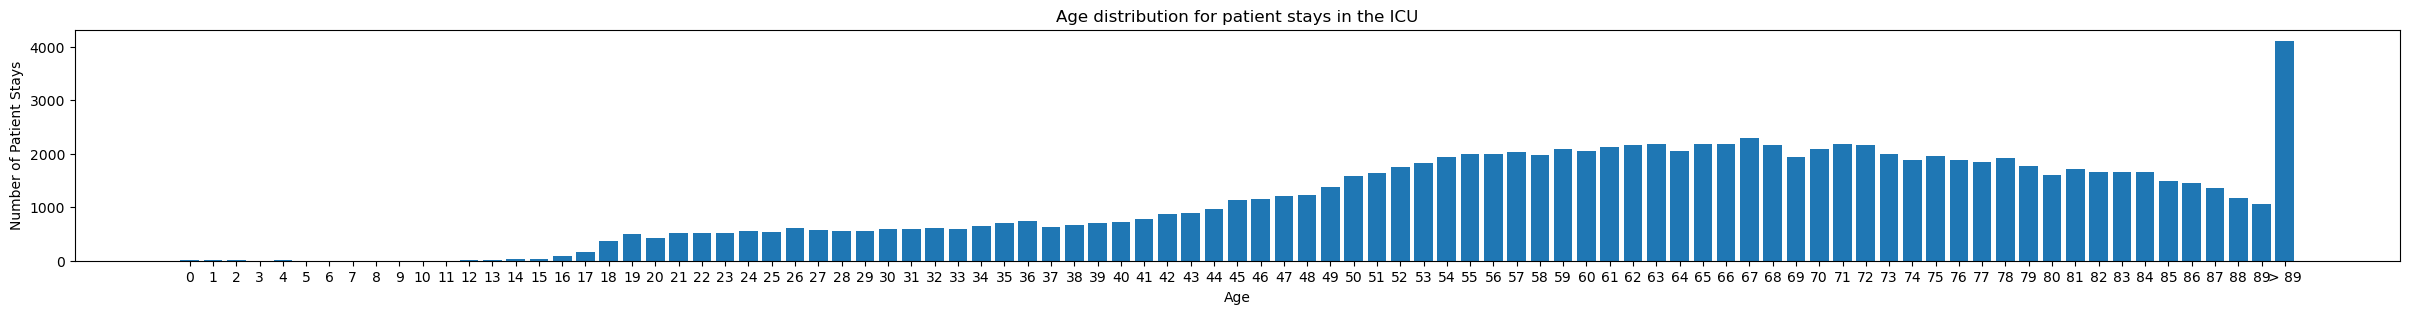

In [15]:
plt.rcParams["figure.figsize"] = (30,3)
plt.bar(x, heights)
plt.xticks(x, labels)
plt.xlabel('Age')
plt.ylabel('Number of Patient Stays')
plt.title('Age distribution for patient stays in the ICU')
plt.show()

In [18]:
ages = list()
for i, count in enumerate(heights):
    [ages.append(i) for _ in range(count)]

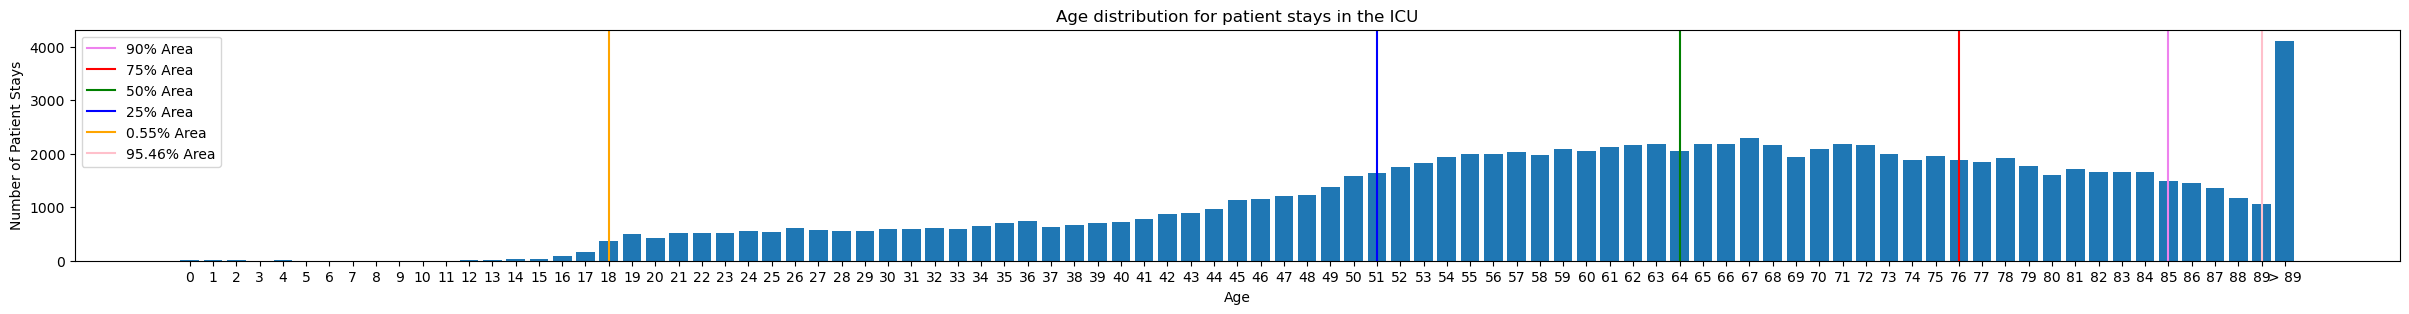

In [19]:
percentile_90 = np.percentile(ages, 90)
percentile_75 = np.percentile(ages, 75)
percentile_50 = np.percentile(ages, 50)
percentile_25 = np.percentile(ages, 25)

score_18 = stats.percentileofscore(ages, 18)
score_89 = stats.percentileofscore(ages, 89)

plt.bar(x, heights)
plt.axvline(x=percentile_90, color = 'violet', label = '90% Area')
plt.axvline(x=percentile_75, color = 'red', label = '75% Area')
plt.axvline(x=percentile_50, color = 'green', label = '50% Area')
plt.axvline(x=percentile_25, color = 'blue', label = '25% Area')
plt.axvline(x=18, color = 'orange', label = '{}% Area'.format(round(score_18, 2)))
plt.axvline(x=89, color = 'pink', label = '{}% Area'.format(round(score_89, 2)))
plt.xticks(x, labels)
plt.rcParams["figure.figsize"] = (30,3)
plt.xlabel('Age')
plt.ylabel('Number of Patient Stays')
plt.title('Age distribution for patient stays in the ICU')
plt.legend()
plt.show()

## age distribution for dying patients

In [20]:

age_death_distribution = df_selected.groupby(['age', 'unitdischargelocation'], dropna = True)['age'].size().to_frame('NoPatients')
age_death_distribution = pd.DataFrame(age_death_distribution)
patients_dead = age_death_distribution.loc[pd.IndexSlice[:, 'Death'], :]

In [21]:
labels1 = natsorted(list(patients_dead.index.get_level_values('age')))
labels1 = [label for label in labels1 if not 'nan' in str(label)]
x1 = [x + int(labels1[0]) for x in range(len(labels1))]
heights1 = list([patients_dead.loc[pd.IndexSlice[label, 'Death'], :].NoPatients for label in labels1])

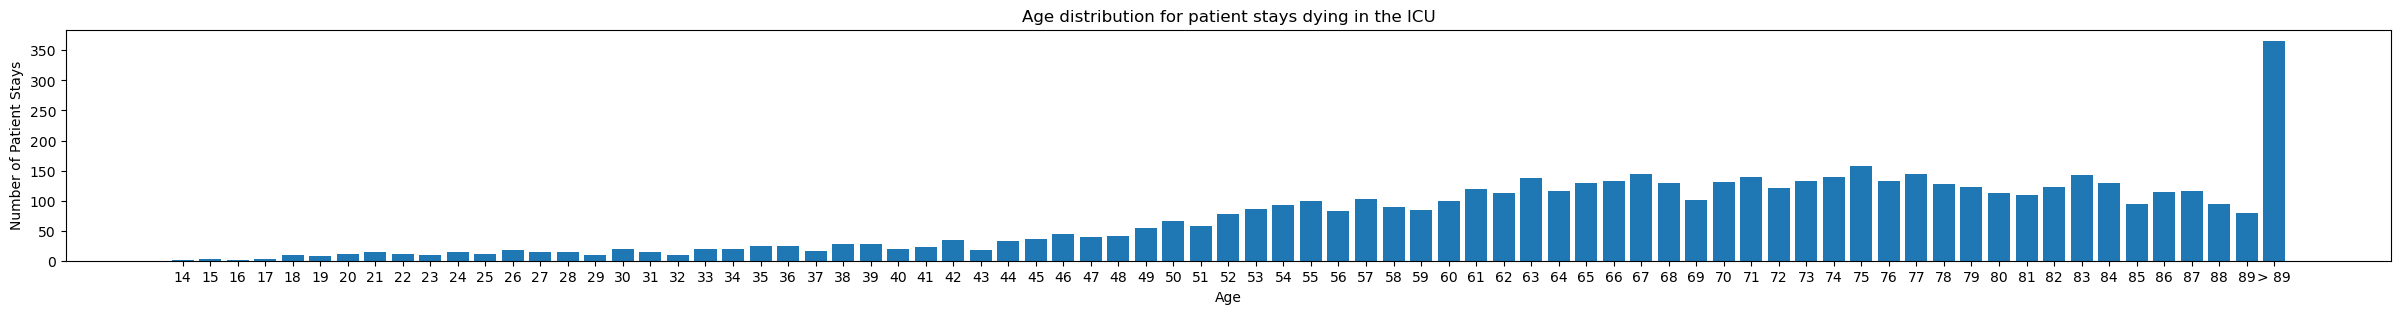

In [22]:
plt.bar(x1, heights1)
plt.xticks(x1, labels1)
plt.rcParams["figure.figsize"] = (30,3)
plt.xlabel('Age')
plt.ylabel('Number of Patient Stays')
plt.title('Age distribution for patient stays dying in the ICU')
plt.show()

In [25]:
min_age = '18'
max_age = '89'
underage_stays = list(df_selected[df_selected['age'] < min_age]['patientunitstayid'].unique())
overage_stays = list(df_selected[df_selected['age'] > max_age]['patientunitstayid'].unique())
print('Number of stays with underage patients: ', len(underage_stays))
print('Number of stays with overage patients: ', len(overage_stays))

Number of stays with underage patients:  352
Number of stays with overage patients:  4116


## Gender distribution

In [28]:
gender_distr_nan = df_selected.groupby('gender', dropna = False)['gender'].size().to_frame('NoPatients')
gender_distr_nan.head()

,NoPatients
gender,
Female,47538
Male,54644
Other,7
Unknown,30
NaN,47


In [29]:

total_stays = gender_distr_nan.sum().NoPatients
stays_without_gender = gender_distr_nan[(gender_distr_nan.index == 'Other') | (gender_distr_nan.index == 'Unknown') | (gender_distr_nan.index.isnull())].sum().NoPatients
percentage = stays_without_gender / total_stays * 100
print('Number of stays without an annotated gender or with gender unknown: ', round(percentage,3))

Number of stays without an annotated gender or with gender unknown:  0.082


In [30]:
female_stays = gender_distr_nan[gender_distr_nan.index == 'Female'].sum()
male_stays = gender_distr_nan[gender_distr_nan.index == 'Male'].sum()

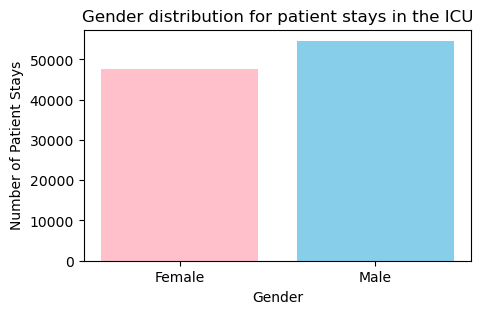

In [33]:
plt.rcParams["figure.figsize"] = (5,3)

x = ['Female', 'Male']
heights = [int(female_stays.iloc[0]), int(male_stays.iloc[0])]
plt.bar(x, heights, color = ['pink', 'skyblue'])
plt.xlabel('Gender')
plt.ylabel('Number of Patient Stays')
plt.title('Gender distribution for patient stays in the ICU')
plt.show()

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import pdvega
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [2]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [3]:
from sqlalchemy import create_engine
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [4]:
query = query_schema + """
select  *
from patient
"""
df_total = pd.read_sql_query(query, con)

n_patient_icu = df_total['patientunitstayid'].nunique()
print("There are {} patients in the icu record.".format(n_patient_icu))


There are 200859 patients in the icu record.


### count the number of times that each patient into the ICU 

In [6]:
# query = query_schema + """
# with frequency_count as (
# select  uniquepid as uniquep, count(*) as frequency
# from patient
# group by uniquep
# )
# select 
#     CASE 
#         when frequency > 4 then 'Greater than 4'
#         else cast(frequency as TEXT)
#     END as frequency_category,  count(*) as occurrence
# from     frequency_count
# group by frequency_category
# order by occurrence DESC
# """
# df_unique = pd.read_sql_query(query, con)
# # df_unique['patientunitstayid'].nunique()

# df_unique['data occurrence'] = df_unique['occurrence'] / df_total['uniquepid'].nunique() * 100.0
# df_unique.sort_values('data occurrence', ascending=False, inplace=True)
# df_unique.head()

,frequency_category,occurrence,data occurrence
0,1,100884,72.387294
1,2,26554,19.053291
2,3,6612,4.744308
3,4,2899,2.080119
4,Greater than 4,2418,1.734987


### select patients that the unitadmitsource comes from  emergency and direct department

In [8]:
# query = query_schema + """

# SELECT DISTINCT patientunitstayid,hospitaladmitOffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,	dischargeweight,unitdischargelocation,	unitdischargestatus
# FROM patient
# WHERE unitadmitsource IN ('Emergency Department', 'Direct Admit') 
#  """

# df_selected_patients = pd.read_sql_query(query, con)
# # df_selected_patients.to_csv('/Users/meisun/Documents/study/thesis/master project/data-preprocessing/selected_patients.csv', index=False)
# # print("Data exported successfully to 'selected_patients.csv'.")
# df_selected_patients.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
1,141178,-14,Female,52,,Emergency Department,54.4,54.4,Step-Down Unit (SDU),Alive
2,141197,-25,Male,71,"Sepsis, pulmonary",Emergency Department,102.1,102.1,Step-Down Unit (SDU),Alive
3,141208,-1,Female,25,"Overdose, sedatives, hypnotics, antipsychotics...",Emergency Department,95.3,95.3,Home,Alive
4,141229,-4,Female,> 89,"CHF, congestive heart failure",Emergency Department,89.8,86.6,Floor,Alive


In [9]:
# n_selected_patients=df_selected_patients['patientunitstayid'].nunique()
# print("There are {} unique patientunitstayid in the selected patients with the selected unitadmitsource: emergency and direct.".format(n_selected_patients))

There are 102266 unique patientunitstayid in the selected patients with the selected unitadmitsource: emergency and direct.
